### Prueba de Selección de la empresa Azzorti para el puesto Prácticante de Ciencia de Datos

Cierta compañía internacional de venta directa tiene un catálogo que tiene
21 días de vida, los primeros tres días se reciben alrededor del 30% (en
promedio) de los pedidos totales que corresponden a los 10 grupos de venta.
Con dichos pedidos se busca pronosticar los pedidos totales al cierre de los
21 días.

In [318]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error, r2_score, average_precision_score, precision_recall_curve
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [360]:
def metricas(y_test, y_pred):
    r2score = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print("MSE", mse)
    print("RMSE", rmse)
    print("RMSE %", rmse * 100)
    #print("R2", r2score)
    #print("R2 %", r2score * 100)

In [491]:
%%time
datos = pd.read_excel("datos/Datos_201901_202009.xlsx", index_col=None, engine="openpyxl") # Retorna un DataFrame
#datos.head(5) # Primeras 5 campañas del 2019
#datos.columns # Listar las columnas
#datos.info() # Lista de metadatos del DataFrame
#datos["PEDIDOS_TOTALES"].describe() # Estadística descriptiva básica de la columna PEDIDOS_TOTALES
#datos[ datos.CAMPAÑA < 202000 ].head(5)# Primeras 5 campañas del 2020

## Gráfico para relacionar variables
#datos.plot(kind='scatter',x='GRUPO_1',y='GRUPO_2',color='red')
#plt.show()

CPU times: user 26.9 ms, sys: 114 µs, total: 27 ms
Wall time: 34.1 ms


In [492]:
%%time
suma_grupos = datos['GRUPO_1'] + datos['GRUPO_2'] + datos['GRUPO_3'] + datos['GRUPO_4'] + datos['GRUPO_5'] + datos['GRUPO_6'] + datos['GRUPO_7'] + datos['GRUPO_8'] + datos['GRUPO_9'] + datos['GRUPO_10']
datos['PROMEDIO_GRUPOS_LOG'] = np.log( suma_grupos / 10 )
datos['AÑO_CAMPAÑA'] = datos['CAMPAÑA'] // 100
datos['TERCIO_AÑO_CAMPAÑA'] = (datos['CAMPAÑA'] % 100) // 3 # Falta optimizar esta característica

datos['GRUPO_1_LOG'] = np.log(datos['GRUPO_1'])
datos['GRUPO_2_LOG'] = np.log(datos['GRUPO_2'])
datos['GRUPO_3_LOG'] = np.log(datos['GRUPO_3'])
datos['GRUPO_4_LOG'] = np.log(datos['GRUPO_4'])
datos['GRUPO_5_LOG'] = np.log(datos['GRUPO_5'])
datos['GRUPO_6_LOG'] = np.log(datos['GRUPO_6'])
datos['GRUPO_7_LOG'] = np.log(datos['GRUPO_7'])
datos['GRUPO_8_LOG'] = np.log(datos['GRUPO_8'])
datos['GRUPO_9_LOG'] = np.log(datos['GRUPO_9'])
datos['GRUPO_10_LOG'] = np.log(datos['GRUPO_10'])
datos['PEDIDOS_TOTALES_LOG'] = np.log(datos['PEDIDOS_TOTALES'])

datos['CAMBIO_PORCENTUAL_GRUPO_1'] = (datos['GRUPO_1'].pct_change(periods=1)).fillna(0)
datos['CAMBIO_PORCENTUAL_GRUPO_2'] = (datos['GRUPO_2'].pct_change(periods=1)).fillna(0)
datos['CAMBIO_PORCENTUAL_GRUPO_3'] = (datos['GRUPO_3'].pct_change(periods=1)).fillna(0)
datos['CAMBIO_PORCENTUAL_GRUPO_4'] = (datos['GRUPO_4'].pct_change(periods=1)).fillna(0)
datos['CAMBIO_PORCENTUAL_GRUPO_5'] = (datos['GRUPO_5'].pct_change(periods=1)).fillna(0)
datos['CAMBIO_PORCENTUAL_GRUPO_6'] = (datos['GRUPO_6'].pct_change(periods=1)).fillna(0)
datos['CAMBIO_PORCENTUAL_GRUPO_7'] = (datos['GRUPO_7'].pct_change(periods=1)).fillna(0)
datos['CAMBIO_PORCENTUAL_GRUPO_8'] = (datos['GRUPO_8'].pct_change(periods=1)).fillna(0)
datos['CAMBIO_PORCENTUAL_GRUPO_9'] = (datos['GRUPO_9'].pct_change(periods=1)).fillna(0)
datos['CAMBIO_PORCENTUAL_GRUPO_10'] = (datos['GRUPO_10'].pct_change()).fillna(0)

datos = datos.drop(columns=['GRUPO_1', 'GRUPO_2', 'GRUPO_3', 'GRUPO_4', 'GRUPO_5', 'GRUPO_6',
                            'GRUPO_7', 'GRUPO_8', 'GRUPO_9', 'GRUPO_10', 'CAMPAÑA', 'PEDIDOS_TOTALES'])
datos.head(5)
datos.columns

CPU times: user 26 ms, sys: 53 µs, total: 26 ms
Wall time: 34 ms


Index(['PROMEDIO_GRUPOS_LOG', 'AÑO_CAMPAÑA', 'TERCIO_AÑO_CAMPAÑA',
       'GRUPO_1_LOG', 'GRUPO_2_LOG', 'GRUPO_3_LOG', 'GRUPO_4_LOG',
       'GRUPO_5_LOG', 'GRUPO_6_LOG', 'GRUPO_7_LOG', 'GRUPO_8_LOG',
       'GRUPO_9_LOG', 'GRUPO_10_LOG', 'PEDIDOS_TOTALES_LOG',
       'CAMBIO_PORCENTUAL_GRUPO_1', 'CAMBIO_PORCENTUAL_GRUPO_2',
       'CAMBIO_PORCENTUAL_GRUPO_3', 'CAMBIO_PORCENTUAL_GRUPO_4',
       'CAMBIO_PORCENTUAL_GRUPO_5', 'CAMBIO_PORCENTUAL_GRUPO_6',
       'CAMBIO_PORCENTUAL_GRUPO_7', 'CAMBIO_PORCENTUAL_GRUPO_8',
       'CAMBIO_PORCENTUAL_GRUPO_9', 'CAMBIO_PORCENTUAL_GRUPO_10'],
      dtype='object')

In [ ]:
#datos = datos.drop(columns=['GRUPO_1', 'GRUPO_2', 'GRUPO_3', 'GRUPO_4', 'GRUPO_5', 'GRUPO_6',
#                              'GRUPO_7', 'GRUPO_8', 'GRUPO_9', 'GRUPO_10'])
#datos
#datos.head(5)
datos
#datos.plot(kind='bar',x='CAMPAÑA', y='CAMBIO_PORCENTUAL_GRUPO_1',color='red')
#datos["AÑO_CAMPAÑA"].value_counts().plot(kind="bar", figsize=(5, 4))
#plt.title("Cambios porcentuales entre campañas")
#plt.show()

<AxesSubplot:xlabel='SUMA_GRUPOS', ylabel='PEDIDOS_TOTALES'>

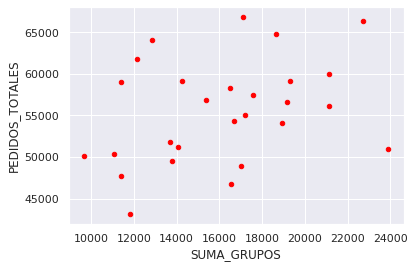

In [97]:
datos.plot(kind='scatter',x='SUMA_GRUPOS',y='PEDIDOS_TOTALES',color='red')

### Modelos de predicción

Se va modelar el problema usando 
    Linear Regresion
    -
    -
    -
   
La variables predictoras se analizaran de acuerdo al proceso de Ingeniería de Característica realizado previamente.

In [334]:
datos.columns

Index(['PROMEDIO_GRUPOS_LOG', 'AÑO_CAMPAÑA', 'TERCIO_AÑO_CAMPAÑA',
       'GRUPO_1_LOG', 'GRUPO_2_LOG', 'GRUPO_3_LOG', 'GRUPO_4_LOG',
       'GRUPO_5_LOG', 'GRUPO_6_LOG', 'GRUPO_7_LOG', 'GRUPO_8_LOG',
       'GRUPO_9_LOG', 'GRUPO_10_LOG', 'PEDIDOS_TOTALES_LOG',
       'CAMBIO_PORCENTUAL_GRUPO_1', 'CAMBIO_PORCENTUAL_GRUPO_2',
       'CAMBIO_PORCENTUAL_GRUPO_3', 'CAMBIO_PORCENTUAL_GRUPO_4',
       'CAMBIO_PORCENTUAL_GRUPO_5', 'CAMBIO_PORCENTUAL_GRUPO_6',
       'CAMBIO_PORCENTUAL_GRUPO_7', 'CAMBIO_PORCENTUAL_GRUPO_8',
       'CAMBIO_PORCENTUAL_GRUPO_9', 'CAMBIO_PORCENTUAL_GRUPO_10'],
      dtype='object')

In [497]:
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
                                        datos.drop(columns=['PEDIDOS_TOTALES_LOG']),
                                        datos['PEDIDOS_TOTALES_LOG'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True)

modelo_linear_regression = LinearRegression()
modelo_random_forest_regressor = RandomForestRegressor(max_depth=6, max_features='sqrt', n_estimators=50,n_jobs=1)
modelo_gradient_boosting_regressor = GradientBoostingRegressor(n_estimators=60, learning_rate=0.5, max_depth=2, random_state=0)

modelo_linear_regression.fit(X_entrenamiento, y_entrenamiento)
modelo_random_forest_regressor.fit(X_entrenamiento, y_entrenamiento)
modelo_gradient_boosting_regressor.fit(X_entrenamiento, y_entrenamiento)

y_predict_linear_regression = modelo_linear_regression.predict(X_prueba)
y_predict_random_forest_regressor = modelo_random_forest_regressor.predict(X_prueba)
y_predict_gradient_boosting_regressor = modelo_gradient_boosting_regressor.predict(X_prueba)
y_predict_linear_regression

array([10.65855667, 10.93490273, 10.83746446, 10.93947535, 10.69938924,
       10.96615527])

In [498]:
metricas(y_prueba, y_predict_linear_regression)

MSE 0.023422136380500776
RMSE 0.15304292332708747
RMSE % 15.304292332708746


In [499]:
metricas(y_prueba, y_predict_random_forest_regressor)

MSE 0.008824191113720539
RMSE 0.09393716577436503
RMSE % 9.393716577436503


In [500]:
metricas(y_prueba, y_predict_gradient_boosting_regressor)

MSE 0.008770237451390252
RMSE 0.0936495459219651
RMSE % 9.36495459219651
